In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import requests 
from urllib.parse import urlencode 

In [137]:
# используем api yandex disk
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/jj6FG3ZFHdCWAQ' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
df = pd.read_csv(download_url) 

In [138]:
df.describe()

,match_week,home_team_score,away_team_score,home_team_possession_percent,away_team_possession_percent,home_team_passing_total_count,away_team_passing_total_count,home_team_passing_accuracy_count,away_team_passing_accuracy_count,home_team_passing_accuracy_percent,...,away_team_fouls,away_team_corners,away_team_crosses,away_team_touches,away_team_interceptions,away_team_aerials_won,away_team_offsides,away_team_goal_kicks,away_team_throw_ins,away_team_long_balls
count,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,2400.000000,2400.000000,2400.000000,2400.0000,2400.000000,...,3540.000000,2400.000000,3540.000000,2400.000000,3540.000000,2400.000000,3489.000000,2400.000000,2400.000000,2400.000000
mean,19.059322,1.526271,1.224576,51.229096,48.808475,515.356250,491.813750,405.564583,383.6875,76.921667,...,10.593503,5.685417,20.713277,624.845000,11.814972,17.133750,1.961594,6.682500,21.052083,69.400833
std,11.052005,1.314444,1.193424,12.262911,12.266838,145.292134,140.649366,146.852360,140.8751,7.555692,...,3.413156,3.072114,8.638578,139.529765,5.292138,7.351023,1.584296,3.106426,6.248851,14.868500
min,1.000000,0.000000,0.000000,18.000000,18.000000,183.000000,181.000000,84.000000,93.0000,46.000000,...,0.000000,0.000000,2.000000,297.000000,1.000000,1.000000,0.000000,0.000000,5.000000,25.000000
25%,9.000000,1.000000,0.000000,42.000000,39.000000,405.750000,387.000000,295.000000,277.7500,72.000000,...,8.000000,3.000000,14.000000,520.000000,8.000000,12.000000,1.000000,4.000000,17.000000,59.000000
50%,19.000000,1.000000,1.000000,51.000000,49.000000,500.000000,478.500000,389.000000,367.0000,78.000000,...,10.000000,5.000000,20.000000,611.000000,11.000000,16.000000,2.000000,6.000000,21.000000,69.000000
75%,29.000000,2.000000,2.000000,61.000000,58.000000,614.250000,582.250000,503.250000,475.2500,83.000000,...,13.000000,8.000000,26.000000,718.250000,15.000000,21.000000,3.000000,9.000000,25.000000,79.000000
max,38.000000,9.000000,9.000000,82.000000,82.000000,1050.000000,1009.000000,957.000000,923.0000,92.000000,...,24.000000,18.000000,64.000000,1120.000000,41.000000,65.000000,10.000000,18.000000,44.000000,121.000000


In [139]:
def apply_winner(row):
    if row['match_result'] == 'H':
        return row['home_team_name']
    elif row['match_result'] == 'A':
        return row['away_team_name']
    return 'NA'

df['winner'] = df.apply(apply_winner, axis=1)

df.head()

,fbref_match_id,season,match_week,match_date,match_time,home_team_name,away_team_name,score,match_result,home_team_score,...,away_team_corners,away_team_crosses,away_team_touches,away_team_interceptions,away_team_aerials_won,away_team_offsides,away_team_goal_kicks,away_team_throw_ins,away_team_long_balls,winner
0,d192bd78,2014-2015,1,2014-08-16,12:45,Manchester United,Swansea City,1:2,A,1,...,NaN,28,NaN,17,NaN,1.0,NaN,NaN,NaN,Swansea City
1,0a235dd1,2014-2015,1,2014-08-16,15:00,Stoke City,Aston Villa,0:1,A,0,...,NaN,18,NaN,17,NaN,1.0,NaN,NaN,NaN,Aston Villa
2,36e3a824,2014-2015,1,2014-08-16,15:00,Leicester City,Everton,2:2,D,2,...,NaN,16,NaN,18,NaN,NaN,NaN,NaN,NaN,NA
3,49405949,2014-2015,1,2014-08-16,15:00,Queens Park Rangers,Hull City,0:1,A,0,...,NaN,33,NaN,10,NaN,0.0,NaN,NaN,NaN,Hull City
4,5d6474b7,2014-2015,1,2014-08-16,15:00,West Ham United,Tottenham Hotspur,0:1,A,0,...,NaN,28,NaN,19,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur


Text(0.5, 1.0, 'Процент побед при игре дома/на выезде')

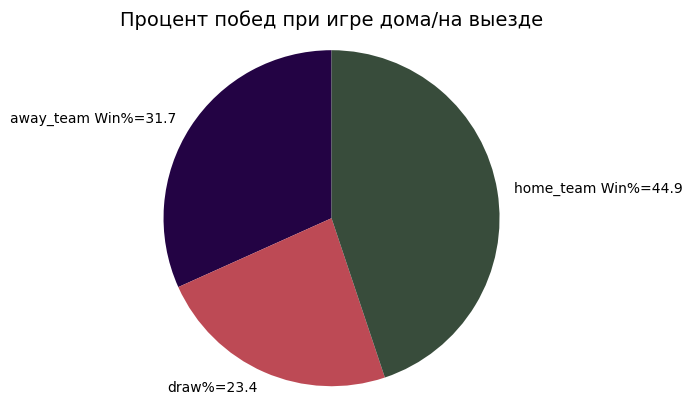

In [140]:
x = 100 * df.groupby('match_result').count()['winner'] / len(df)

plt.pie(
    x,
    labels=[
        'away_team Win%='+str(x[0].round(1)),
        'draw%='+str(x[1].round(1)),
        'home_team Win%='+str(x[2].round(1)),
    ],
    startangle=90,
    colors=['#230344', '#bd4a55', '#384c3b']
)
plt.axis('equal')
plt.title('Процент побед при игре дома/на выезде', fontsize=14)

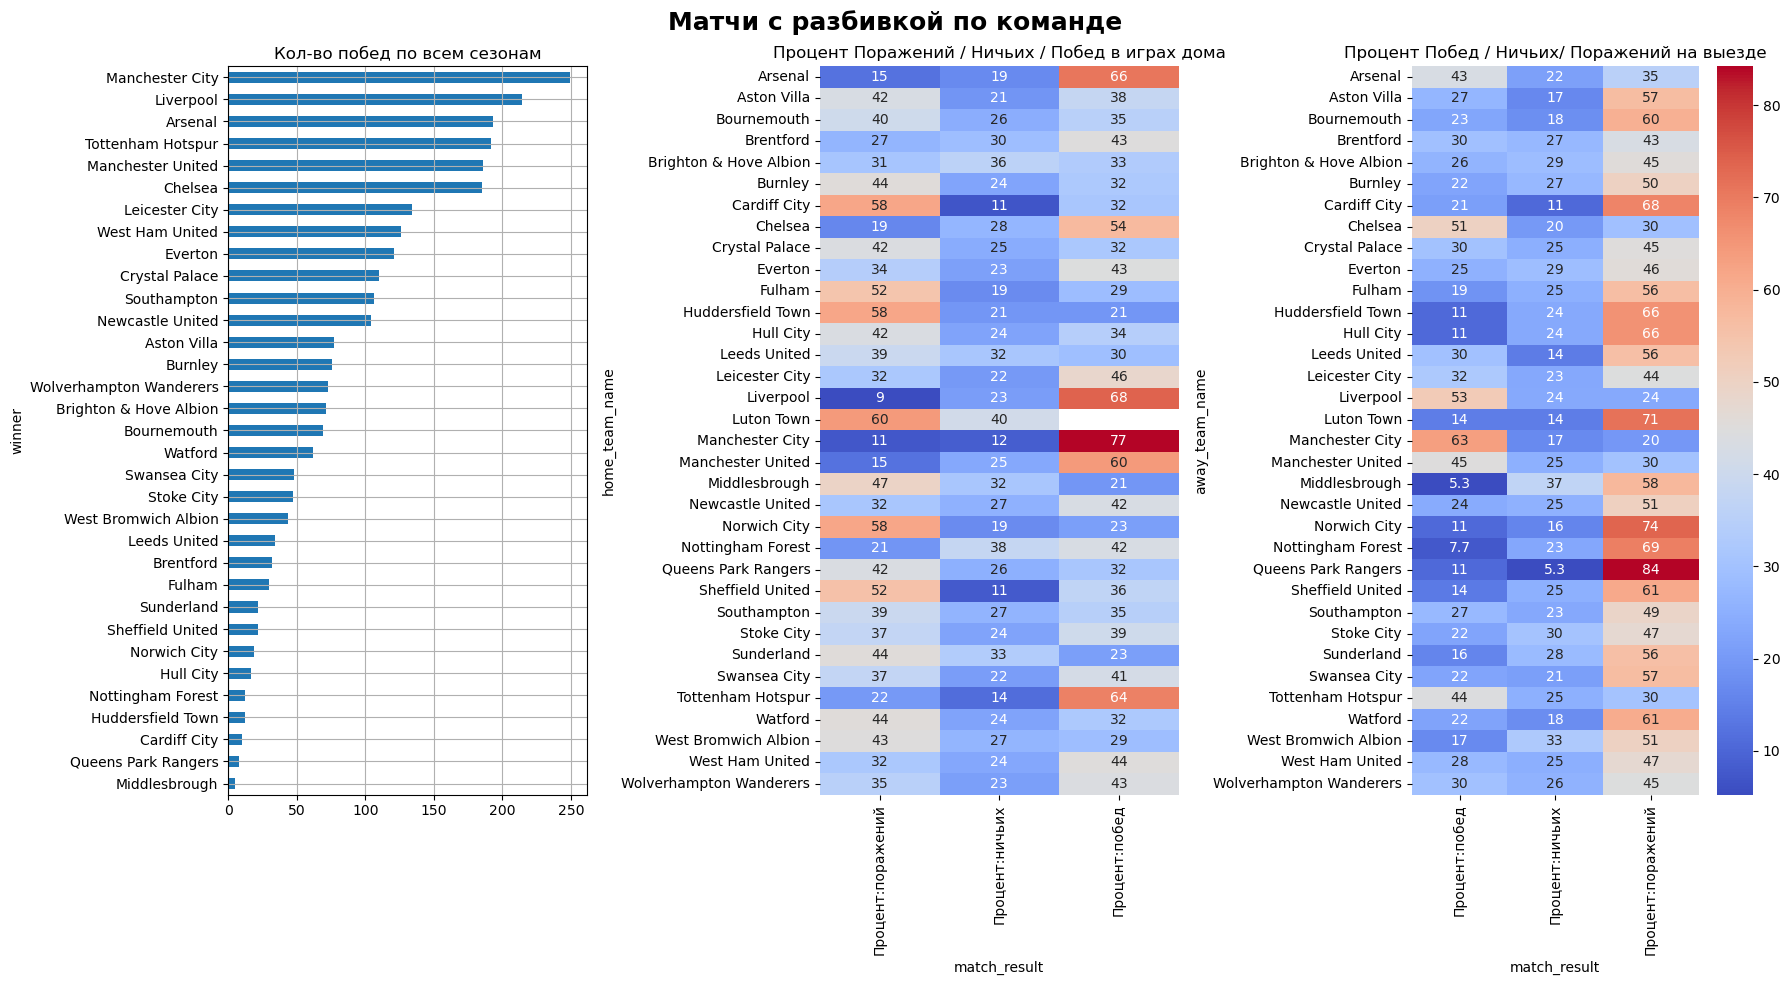

In [170]:
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.2, wspace=0.4)
plt.suptitle("Матчи с разбивкой по команде", fontsize=18, fontweight='bold')

plt.subplot(1, 3, 1)
df.groupby('winner').count()['match_result'].sort_values(ascending=True)[1:-1].plot(kind='barh', grid=True)
plt.title('Кол-во побед по всем сезонам')

plt.subplot(1,3,2)
df_home_team = df.pivot_table(values='away_team_name',  index='home_team_name', columns='match_result', aggfunc='count')
total = df_home_team.sum(axis=1)

homeColumnNames = {
    'A': 'поражений',
    'D': 'ничьих',
    'H': 'побед'
}

for i in df_home_team.columns.tolist():
    df_home_team['Процент:'+homeColumnNames[i]] = 100 * df_home_team[i] / total
    
sns.heatmap(df_home_team[['Процент:поражений','Процент:ничьих','Процент:побед']], cmap='coolwarm', annot=True, cbar=False)
plt.title('Процент Поражений / Ничьих / Побед в играх дома')
plt.tight_layout()

plt.subplot(1,3,3)
df_away_team = df.pivot_table(values='home_team_name', index='away_team_name', columns='match_result', aggfunc='count')
total = df_away_team.sum(axis=1)

awayColumnNames = {
    'A': 'побед',
    'D': 'ничьих',
    'H': 'поражений'
}

for i in df_away_team.columns.tolist():
    df_away_team['Процент:'+awayColumnNames[i]] = 100 * df_away_team[i] / Total
sns.heatmap(df_away_team[['Процент:побед','Процент:ничьих','Процент:поражений']], cmap='coolwarm', annot=True)
plt.title('Процент Побед / Ничьих/ Поражений на выезде')
plt.tight_layout()

Text(0.5, 1.0, 'Общие кол-во голов на выезде')

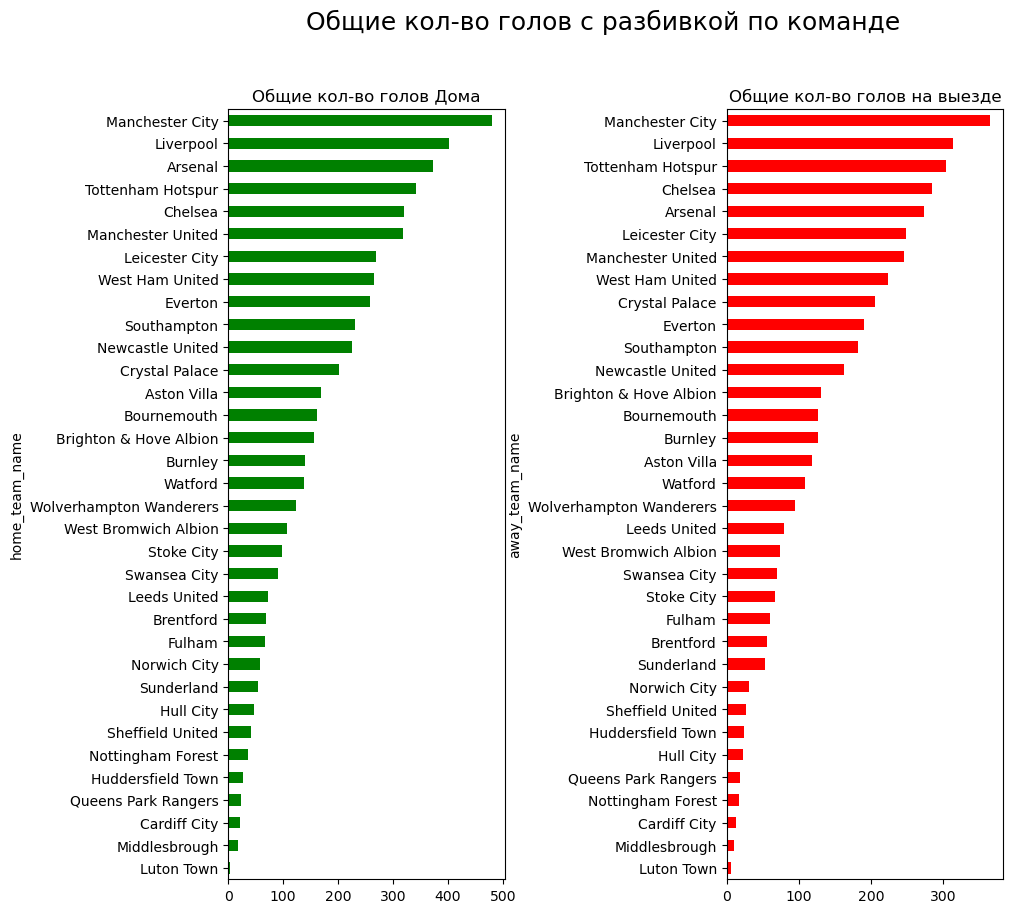

In [184]:
df_goal = df.pivot_table(values=['home_team_score', 'away_team_score'], index='home_team_name', columns='away_team_name', aggfunc='sum')
df_goal

plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=.8)
plt.suptitle('Общие кол-во голов с разбивкой по команде', fontsize=18)
plt.subplot(1, 2, 1)
df_goal.xs('home_team_score', level=0, axis=1).sum(axis=1).sort_values(ascending=True).plot(kind='barh', color='green')
plt.title('Общие кол-во голов Дома')
plt.subplot(1, 2, 2)
df_goal.xs('away_team_score', level=0, axis=1).sum(axis=0).sort_values().plot(kind='barh', color='red')
plt.title('Общие кол-во голов на выезде')